<font color='red'> 
# Computational Statistics for Data Analysis
<font\>

# <div class="alert alert-error"><strong><center><small>Statistics is the discipline of using data samples to support claims about populations.<small></center></strong> </div>

Statistics is based on 2 main concepts:

* A **population** is a collection of objects, items (“units”) about which information is sought.

* A **sample** is a part of the population that is observed.

# Index

### 1 Descriptive Statistics.
* 1.1 Getting data
* 1.2 Data preparation
* 1.3 Improving data as a pandas DataFrame
* 1.4 Data cleaning and preparation
 

### 2 Exploratory Data Analysis.
* 2.1 Summarizing the data: mean, variance, median, quantiles & percentiles
* 2.2 Histogram
* 2.3 Data distributions
* 2.3.1 PMF
* 2.3.2 CDF
* 2.4 Outliers
* 2.5 Measuring asymmetry  (optional)
* 2.5.1 Skewness
* 2.5.2 Pearson's median skewness coefficient
* 2.6 Relative risk
* 2.7 A firts glimpse to Conditional Probability



<center><img src="images/taft_puck_eggdig.jpg">
</center><center><img src="images/eggs.png"></center>
<center><small>Headline from Chicago Tribune June 13, 1897.</small></center>

Read more: "http://ptara.com/2011/12/17/never-eat-eggs-with-an-angry-stomach/"

### "Do firts babies arrive late?"

***From [Think Stats: Probability and Statistics for Programmers](http://www.greenteapress.com/thinkstats/), by Allen B. Downey, published by O'Reilly Media.***

Some people believe it is true, but **without data analysis** to support it, this claim is a case of **anecdotal evidence**:

* There are a **small number of samples** (personal experience, friends, etc.).
* There is a **selection bias**: most *believers* are interested in this claim because their first babies were late.
* There is a **confirmation bias**: believers might be more likely to contribute data that confirm it.
* Sources are **innaccurate**: personal stories are subject to memory deformations. 



<font color='blue'>
# 1 Descriptive Statistics.
* 1.1 Getting data
* 1.2 Data preparation
* 1.3 Improving data as a pandas DataFrame
* 1.4 Data cleaning 
 <font\>

There are 13593 pregnancies in our data. The meaning of the data is (each record is in a line):

+ <code>case.id</code> is the ID of the respondent. From col 1 to 12.
+ <code>prg.lenght</code> is the duration of the pregnancy in weeks. From col 275 to 276. 
+ <code>outcome</code> is the outcome of the pregnancy (1 = live birth). Col 277.
+ <code>birth.ord</code> is the integer birth order of each live birth. From col 278 to 279.
+ <code>final.wgt</code> is the statistical weight associated to the respondent (it is a floating point value that indicates the number of people in the U.S. population this respondent represents). From col 423 to 440.

## 1.1 Getting Data

There is an interesting and publicly available **data source** to check this claim. Since 1973 the U.S. Centers for Disease Control and Prevention (CDC) have conducted a survey, the National Survey of Family Growth (NSFG), to gather *information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men's and women's health.* 

Data can be downloaded from: 

http://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm#cyc6downdatafiles

We will use this file: 

* Female Pregnancy Data File (2002FemPreg.dat): one record for each pregnancy reported by a respondent.

<small> If curious: Online documentation of the survey is at http://www.icpsr.umich.edu/nsfg6.<small> 

### 1.2 Data preparation

One of the reasons we are using a general-purpose language such as Python rather than a stats language like R is that for many projects the *hard* part is preparing the data, not doing the analysis.

The most common steps are:

1. **Getting the data**. Data can be directly read from a file or it might be necessary to scrap the web.
2. **Parsing the data**.  Of course, this depends on what format it is in: plain text, fixed columns, CSV, XML, HTML, etc.
3. **Cleaning the data**.  Survey responses and other data files are almost always incomplete.  Sometimes there are multiple codes for things like, *not asked*, *did not know*, and *declined to answer*. And there are almost always errors. A simple strategy is to remove or ignore incomplete records.
4. **Building data structures**. Once you read the data, you usually want to store it in a data structure that lends itself to the analysis you want to do.

If the data fits into memory, building a data structure is usually the way to go.   If not, you could build a **database**, which is an out-of-memory data structure. Most databases provide a mapping from keys to values, so they are like dictionaries.

In [30]:
file = open('files/2002FemPreg.dat', 'r')

# Let's build a list of lists.

preg=[]
for line in file:
    preg.append([int(line[:12]), int(line[274:276]), int(line[276]),
                 int(line[277:279]), float(line[422:440])])

ValueError: invalid literal for int() with base 10: '  '

Ooops! There is something wrong in the data file!

By inspecting the data we can observe that there are some empty records that caused an error to the ``int`` function.

In [31]:
file = open('files/2002FemPreg.dat', 'r')

def chr_int(a):
    if a == '  ':
        return 0
    else:
        return int(a)
        
preg=[]
for line in file:
    lst  = [int(line[:12]), int(line[274:276]), int(line[276]), \
                 chr_int(line[277:279]), float(line[422:440])]
    preg.append(lst)

In [32]:
print(preg[1])
print('The number of entries is: ', len(preg))

[1, 39, 1, 2, 6448.271111704751]
The number of entries is:  13593


### 1.3 Importing data as a pandas DataFrame

In [33]:
%matplotlib inline

import pandas as pd
df = pd.DataFrame(preg) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes 
# http://pandas.pydata.org/pandas-docs/dev/dsintro.html#dataframe

df.columns = ['caseId', 'prgLength', 'outcome', 'birthOrd', 'finalWgt']
df.head()

,caseId,prgLength,outcome,birthOrd,finalWgt
0,1,39,1,1,6448.271112
1,1,39,1,2,6448.271112
2,2,39,1,1,12999.542264
3,2,39,1,2,12999.542264
4,2,39,1,3,12999.542264


In [34]:
df.tail()

,caseId,prgLength,outcome,birthOrd,finalWgt
13588,12571,39,1,1,6269.200989
13589,12571,6,2,0,6269.200989
13590,12571,5,2,0,6269.200989
13591,12571,39,1,2,6269.200989
13592,12571,39,1,3,6269.200989


In [35]:
df.shape

(13593, 5)

In [36]:
counts = df.groupby('birthOrd').size()
print(counts[1])
print(counts) 

# also: df.outcome.value_counts()

4413
birthOrd
0     4445
1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
dtype: int64


Let's count the number of  births according to the order:

Let's build a partition of *live births* into two groups: first babies and others.

In [37]:
# Divide records into two lists: first babies and others.

firstbirth = df[ (df.outcome == 1) & (df.birthOrd == 1)]
print('The number of first babies is: ', firstbirth.shape)

The number of first babies is:  (4413, 5)


In [38]:
othersbirth = df[(df.outcome == 1) & (df.birthOrd >= 2)]
print('The number of others babies is: ', othersbirth.shape)

The number of others babies is:  (4735, 5)


### 1.4 Data Cleaning

The most common steps are:

+ **Sample the data**. If the amount of raw data is huge, processing all of them may require an extensive amount of processing power which may not be practical.  In this case, it is quite common to sample the input data to reduce the size of data that need to be processed.

+ **Impute missing data**. It is quite common that some of the input records are incomplete in the sense that certain fields are missing or have input error.  In a typical tabular data format, we need to validate each record contains the same number of fields and each field contains the data type we expect. In case the record has some fields missing, we have the following choices: 
<small>
* (a) Discard the whole record if it is incomplete; 
* (b) Infer the missing value based on the data from other records.  A common approach is to fill the missing data with the average, or the median.
<small>



+ **Normalize numeric value**. Normalize data is about transforming numeric data into a uniform range.
+ **Reduce dimensionality**. High dimensionality can be a problem for some machine learning methods.  There are two ways to reduce the number of input features.  One is about $removing$ $irrelevant$ input variables, another one is about $removing$ $redundant$ input variables.
+ **Add derived features**. In some cases, we may need to compute additional attributes from existing attributes (f.e. converting a geo-location to a zip code, or converting the age to an age group).
+ **Discretize numeric value into categories**. Discretize data is about cutting a continuous value into ranges and assigning the numeric with the corresponding bucket of the range it falls on.  For numeric attribute, a common way to generalize it is to discretize it into ranges, which can be either constant width (variable height/frequency) or variable width (constant height).
+ **Binarize categorical attributes**. Certain machine learning models only take binary input (or numeric input).  In this case, we need to convert categorical attribute into multiple binary attributes, while each binary attribute corresponds to a particular value of the category. 

+ **Select, combine, aggregate data**. Designing the form of training data is the most important part of the whole predictive modeling exercise because the accuracy largely depends on whether the input features are structured in an appropriate form that provide strong signals to the learning algorithm. Rather than using the raw data as it is, it is quite common that multiple pieces of raw data need to be combined together, or aggregating multiple raw data records along some dimensions.

<font color='blue'>
## 2 Exploratory Data Analysis.
* 2.1 Summariizing the data: mean, variance, median, quantiles & percentiles
* 2.2 Histogram
* 2.3 Data distributions
* 2.3.1 PMF
* 2.3.2 CDF
* 2.4 Outliers
* 2.5 Measuring asymmetry
* 2.5.1 Skewness
* 2.5.2 Pearson's median skewness coefficient
* 2.6 Relative risk
* 2.7 A firts glimpse to Conditional Probability
<font\>

### 2.1 Summarizing the data: 
#### 2.1.1 Sample Mean 

If you have a sample of $n$ values, $x_i$, the **sample mean** is the sum of the values divided by the number of values:

$$ \mu = \frac{1}{n} \sum_i x_i$$

The **mean** is the most basic and important summary statistic. It describes the central tendency of a sample. 

Let's see if there is a difference between firstbirth and othersbirth:

In [39]:
print('The mean of the first birth is: ', firstbirth['prgLength'].mean(), '\nThe mean of the non first birth is: ', othersbirth['prgLength'].mean())

The mean of the first birth is:  38.60095173351461 
The mean of the non first birth is:  38.52291446673706


In [40]:
print(abs(firstbirth['prgLength'].mean()-othersbirth['prgLength'].mean()),"weeks")

0.07803726677754952 weeks


In [41]:
print(abs(firstbirth['prgLength'].mean()-othersbirth['prgLength'].mean())*7,"days")

0.5462608674428466 days


In [42]:
print(abs(firstbirth['prgLength'].mean()-othersbirth['prgLength'].mean())*7*24, "hours")

13.11026081862832 hours


This difference in sample means can be considered a first evidence of our hypothesis!


**Comment: ** *Later, we will work with both concepts: the population mean and the sample mean. Do not confuse them! Remember, the first one is the mean of samples taken from the population and the second one is the mean of the whole population.*

#### 2.1.2 Sample Variance

Usually, mean is not a sufficient descriptor of the data, we can do a little better with two numbers: mean and **variance**:

$$ \sigma^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

**Variance** $\sigma^2$ describes the *spread* of data. The term $(x_i - \mu)$ is called the *deviation from the mean*, so variance is the mean squared deviation.

The square root of variance, $\sigma$, is called the **standard deviation**. We define standard deviation because variance is hard to interpret (in the case the units are grams, the variance is in grams squared).


In [43]:
mu1 = firstbirth['prgLength'].mean()
mu2 = othersbirth['prgLength'].mean()
var1 = firstbirth['prgLength'].var()
var2 = othersbirth['prgLength'].var()
std1 = firstbirth['prgLength'].std()
std2 = othersbirth['prgLength'].std()
print('Firstbirth mu1:', mu1, 'var1:', var1, 'std1:', std1)
print('Othersbirhts mu2:', mu2, 'var2:', var2, 'std2:', std2)

Firstbirth mu1: 38.60095173351461 var1: 7.794713509229059 std1: 2.7919014146686947
Othersbirhts mu2: 38.52291446673706 var2: 6.842683519298573 std2: 2.615852350439255


#### 2.1.3 Sample Median

The statistical median is an order statistic that gives the *middle* value of a sample. It is a value more robust to ouliers.

In [44]:
median1= firstbirth['prgLength'].median()
median2= othersbirth['prgLength'].median()
print('The median measures of both first- and otherbirths are: ', median1, median2)

The median measures of both first- and otherbirths are:  39.0 39.0


<center><img src="images/mean_median.gif">

#### 2.1.4 Summarizing the data: Quantiles & Percentiles

Order the sample $\{ x_i \}$, then find $x_p$ so that it divides the data into two parts where:

+ a fraction $p$ of the data values are less than or equal to $x_p$ and
+ the remaining fraction $(1 − p)$ are greater than $x_p$.

That value $x_p$ is the pth-quantile, or 100×pth percentile.

**5-number summary**: $x_{min}, Q_1, Q_2, Q_3, x_{max}$, where $Q_1$ is the 25×pth percentile,
$Q_2$ is the 50×pth percentile and $Q_3$ is the 75×pth percentile.

### 2.2 Histogram

The most common representation of a distribution is a **histogram**, which is a graph that shows the frequency of each value.

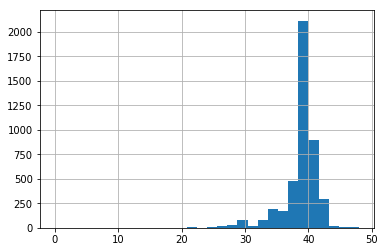

In [45]:
fb=firstbirth['prgLength']

fb.hist(normed=0, histtype='stepfilled', bins=30)

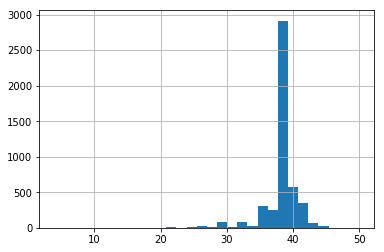

In [46]:
        
ob=othersbirth['prgLength']
ob.hist(normed=0, histtype='stepfilled', bins=30)

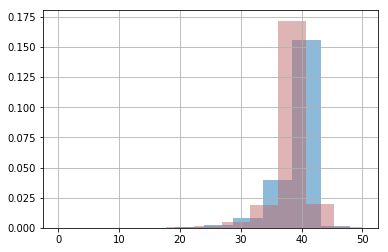

In [47]:
import seaborn as sns
fb.hist(normed=1, histtype='stepfilled', alpha=.5)   # default number of bins = 10
ob.hist(normed=1, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75))

In [48]:
import scipy.stats as stats

# Computes several descriptive statistics:
# size of the data 
# minimum and maximum value of data array
# arithmetic mean 
# unbiased variance 
# biased skewness 
# kurtosis (Fisher)

print(stats.describe(firstbirth['prgLength'].values))
print(stats.describe(othersbirth['prgLength'].values))

DescribeResult(nobs=4413, minmax=(0, 48), mean=38.600951733514613, variance=7.7947135092292026, skewness=-2.5904758400585424, kurtosis=15.132902638550163)
DescribeResult(nobs=4735, minmax=(4, 50), mean=38.522914466737063, variance=6.8426835192984843, skewness=-3.1536063733026825, kurtosis=20.77720107598575)


## 2.3 Data Distributions

Summarizing can be dangerous: very different data can be described by the same statistics. It must be validated by inspecting the data.

We can look at the **data distribution**, which describes how often (frequency) each value appears.


We can normalize the frequencies of the histogram by dividing/normalizing by $n$, the number of samples. The normalized histogram is called **Probability Mass Function (PMF)**.

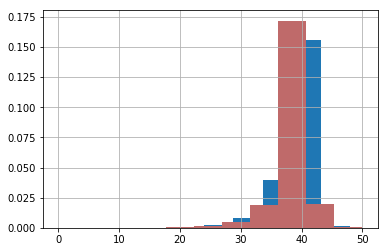

In [49]:
# if needed, execute the command 'pip3 install seaborn'

import seaborn as sns

x = firstbirth['prgLength']
y = othersbirth['prgLength']

x.hist(normed=1, histtype='stepfilled')
y.hist(normed=1, histtype='stepfilled', color=sns.desaturate("indianred", .75))

The **cumulative distribution function (CDF)**, or just distribution function, describes the probability that a real-valued random variable X with a given probability distribution will be found to have a value less than or equal to x. 

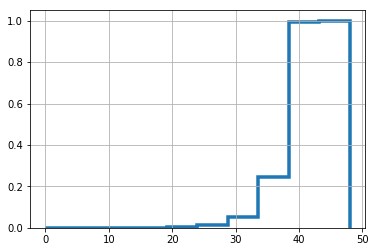

In [50]:
x.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5)

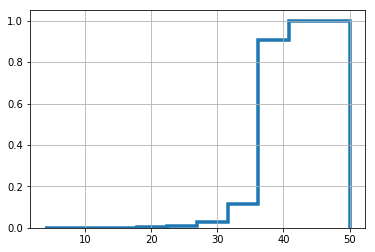

In [51]:
ob.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5)

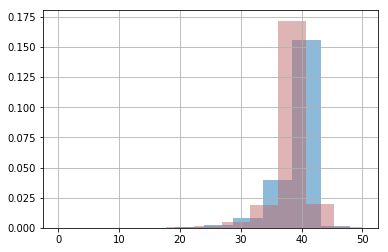

In [52]:
fb.hist(bins=10, normed=1, histtype='stepfilled', alpha=.5)   # default number of bins = 10
ob.hist(bins=10, normed=1, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75))

# Check with 20, 30, 60 bins.

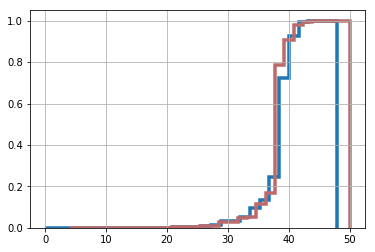

In [53]:
fb.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=30)
ob.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=30, color=sns.desaturate("indianred", .75))

In [54]:
print("The mean sample difference is ", x.mean() - y.mean(), "weeks.")

The mean sample difference is  0.07803726677754952 weeks.


## 2.4 Outliers

**Ouliers** are data samples with a value that is far from the central tendency.

We can find outliers by:

+ Computing samples that are *far* from the median.
+ Computing samples whose value *exceeds the mean* by 2 or 3 standard deviations.

This expression will return a series of boolean values that you can then index the series by:

In [55]:
(df.outcome == 1) & (df['prgLength'] < df['prgLength'].median() - 10)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
13563    False
13564    False
13565    False
13566    False
13567    False
13568    False
13569    False
13570    False
13571    False
13572    False
13573    False
13574    False
13575    False
13576    False
13577    False
13578    False
13579    False
13580    False
13581    False
13582    False
13583    False
13584    False
13585    False
13586    False
13587    False
13588    False
13589    False
13590    False
13591    False
13592    False
Length: 13593, dtype: bool

In [56]:
df['prgLength'].median()

39.0

In [57]:
df[(df.outcome == 1) & (df['prgLength'] < df['prgLength'].median() - 10)]

,caseId,prgLength,outcome,birthOrd,finalWgt
138,150,9,1,6,6416.070865
157,172,24,1,1,2791.696869
237,253,28,1,1,15882.012823
541,515,18,1,2,2759.633732
628,587,24,1,1,8176.922132
645,600,26,1,1,3384.652708
734,685,28,1,1,7870.905285
1041,928,20,1,1,16021.332407
1114,989,28,1,3,1588.832170
1169,1042,26,1,5,6710.493470


In [58]:
df[(df.outcome == 1) & (df['prgLength'] > df['prgLength'].median() + 6)]

,caseId,prgLength,outcome,birthOrd,finalWgt
2416,2145,48,1,1,3770.020203
4783,4285,50,1,2,4953.764713
4920,4388,48,1,2,6484.086784
6889,6251,48,1,1,2550.828513
6890,6251,48,1,2,2550.828513
7158,6496,48,1,1,2276.785379
7161,6496,48,1,2,2276.785379
7592,6896,48,1,4,4744.403917
8998,8250,50,1,2,39510.941068
11357,10451,47,1,1,2776.806810


If we think that outliers correspond to errors, an option is to trim the data by discarting the highest and lowest values.

In [59]:
df2 = df.drop(df.index[(df.outcome == 1) & (df['prgLength'] > df['prgLength'].median() + 6)])
df2[(df2.outcome == 1) & (df2['prgLength'] > df2['prgLength'].median() + 6)] # check if removed


,caseId,prgLength,outcome,birthOrd,finalWgt


In [60]:
df3 = df2.drop(df2.index[(df2.outcome == 1) & (df2['prgLength'] < df2['prgLength'].median() - 10)])
df3[(df3.outcome == 1) & (df3['prgLength'] < df3['prgLength'].median() - 10)]

,caseId,prgLength,outcome,birthOrd,finalWgt


In [61]:
firstbirth3 = df3[(df3.outcome == 1) & (df3.birthOrd == 1)]
mu3fb = firstbirth3['prgLength'].mean()
std3fb = firstbirth3['prgLength'].std()
md3fb = firstbirth3['prgLength'].median()
print('Before outliers removing: ', mu1, std1, median1, firstbirth['prgLength'].min(), firstbirth['prgLength'].max())
print('After outliers removing: ', mu3fb, std3fb, md3fb, firstbirth3['prgLength'].min(),firstbirth3['prgLength'].max())

Before outliers removing:  38.60095173351461 2.7919014146686947 39.0 0 48
After outliers removing:  38.76212364973569 2.307150203993601 39.0 29 45


In [62]:
othersbirth3 = df3[(df3.outcome == 1) & (df3.birthOrd >= 2)]
mu3ob = othersbirth3['prgLength'].mean()
std3ob = othersbirth3['prgLength'].std()
md3ob = othersbirth3['prgLength'].median()
print('Before outliers removing: ', mu2, std2, median2, othersbirth['prgLength'].min(),othersbirth['prgLength'].max())
print('After outliers removing: ', mu3ob, std3ob, md3ob, firstbirth3['prgLength'].min(), firstbirth3['prgLength'].max())

Before outliers removing:  38.52291446673706 2.615852350439255 39.0 4 50
After outliers removing:  38.658192693868834 2.0951260243080556 39.0 29 45


In [63]:
print("The mean sample difference is: ",firstbirth3['prgLength'].mean() - othersbirth3['prgLength'].mean(), "weeks.")

The mean sample difference is:  0.10393095586685774 weeks.


In [64]:
print(len(df3.prgLength[(df3.outcome == 1)]))
print(len(df.prgLength[(df.outcome == 1)]))

9032
9148


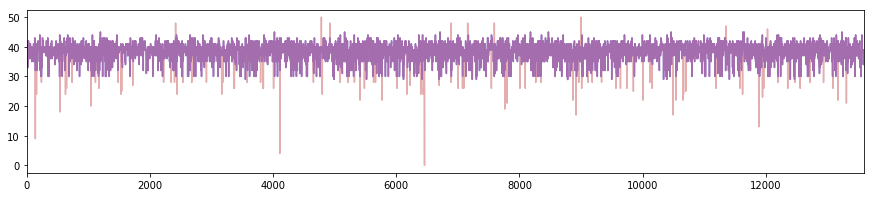

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,3))

df3.prgLength[(df3.outcome == 1)].plot(alpha=.5, color='blue')
df.prgLength[(df.outcome == 1)].plot(alpha=.5, 
                            color=sns.desaturate("indianred", .95))


Let's see what is happening near the mode:

In [66]:
import numpy as np

x = firstbirth3['prgLength']
y = othersbirth3['prgLength']

countx,divisionx = np.histogram(x) 
county,divisiony = np.histogram(y)
print (countx-county)


[   5   -2    7    5   23 -102 -509  133  108    2]


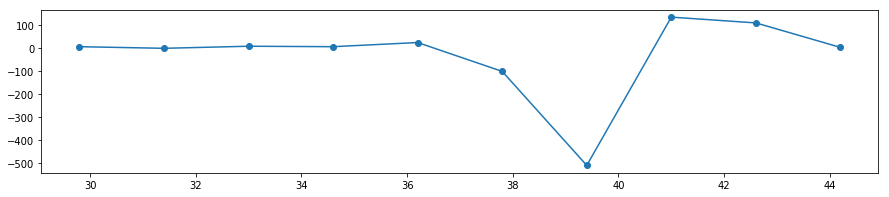

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,3))
val = [(divisionx[i]+divisionx[i+1])/2 for i in range(len(divisionx)-1)]
plt.plot(val, countx-county, 'o-') 

## There is still some evidence for our hypothesis!

### 2.5 Measuring asymmetry.

** Skewness** is a statistic that measures the asymmetry of set of $n$ data samples $x_i$:

$$ g_1 = \frac{\frac{1}{n} \sum_i (x_i - \mu)^2 }{\frac{1}{n} \sum_i (x_i - \mu)^3 }$$

The numerator is the mean squared deviation (or variance) and the denominator the mean cubed deviation.

Negative deviation indicates that the distribution "skews left" (it extends farther to the left than to the right).

** Skewness** can be affected by outliers!!! A simpler alternative is to look at the relationship between mean ($\mu$) and median ($\mu_{\frac{1}{2}}$). 

** 2.6 Pearson's median skewness coefficient** is a more robust alternative:

$$ g_p = \frac{3(\mu - \mu_{\frac{1}{2}})}{\sigma} $$

**Exercise**:

+ Read the file ``run10.txt`` from the ``files`` directory. It represents 16.924 runners who finished the 2012 Cherry Blossom 10 mile run in USA. The file is a ``tab``separated file. It can be read with the pandas ``read_table`` function.
+ Compute the mean time.
+ Compute the difference in mean between men and women.
+ Visualize both distributions (normalized histogram).

**Exercise**: Write a function to compute $g_1$ and $g_p$ of the pregnancy length.

In [68]:
## Your solution here

**Exercises**: 

+ Could you give a real example, where for all data samples, $x_i \leq \mu$? 
+ Could you give a real example, where for all data samples, $x_i \leq \mu_{\frac{1}{2}}$? This is really a distribution that skews left!
+ If we ask to a random group of people "What is your position with respect to the average driver?", what kind of distribution would we get? 

## 2.6 Relative Risk

Let's say that a baby is "early" if it is born during week 37 or earlier, "on time" if it is born during week 38, 39 or 40, and "late" if it is born during week 41 or later. 

In [69]:
firstbirth3 = df3[(df3.outcome == 1) & (df3.birthOrd == 1)]
firstbirth3[(firstbirth3.prgLength<38)].head()

,caseId,prgLength,outcome,birthOrd,finalWgt
15,15,33,1,1,5553.495599
42,46,36,1,1,28882.846732
60,69,37,1,1,6280.839607
107,119,35,1,1,32053.430260
139,151,32,1,1,5832.772537


Let's compute the probability of being *early*, *on time* and *late* for first babies and the others.

In [70]:
print("Firsts babies: ")
print("Early",len(firstbirth3[firstbirth3['prgLength'] <38])/
      float(len(firstbirth3.index)))
print("Late", len(firstbirth3[firstbirth3['prgLength'] >40])/
      float(len(firstbirth3.index)))
print("On time", len(firstbirth3[(firstbirth3['prgLength'] >37) &
    (firstbirth3['prgLength'] < 41)])/float(len(firstbirth3.index)))

Firsts babies: 
Early 0.17191450241323833
Late 0.1565157435072397
On time 0.6715697540795219


In [71]:
print("Other babies:")
print("Early", len(othersbirth3[othersbirth3['prgLength'] <38])/
      float(len(othersbirth3.index)))
print("Late", len(othersbirth3[othersbirth3['prgLength'] >40])/
      float(len(othersbirth3.index)))
print("On time", len(othersbirth3[(othersbirth3['prgLength'] >37) &
    (othersbirth3['prgLength']<41)])/float(len(othersbirth3.index)))

Other babies:
Early 0.16000854518265328
Late 0.0935697500534074
On time 0.7464217047639393


The **relative risk** is the ratio of two probabilities. In our case, the probability that a first baby is born early is 17%. For other babies is 16%, so the relative risk is:

In [72]:
a = len(firstbirth3[firstbirth3['prgLength'] <38])/float(len(firstbirth3.index))
b = len(othersbirth3[othersbirth3['prgLength'] <38])/float(len(othersbirth3.index))
print("First babies are about ", a/b, " more likely to be early.")

First babies are about  1.074408258740145  more likely to be early.


That means that first babies are about 7% more likely to be early. For the case of late births:

In [73]:
a = len(firstbirth3[firstbirth3['prgLength'] >40])/float(len(firstbirth3))
b = len(othersbirth3[othersbirth3['prgLength'] >40])/float(len(othersbirth3))
print("First babies are about ", a/b, " more likely to be late.")

First babies are about  1.6727173409986051  more likely to be late.


That means that first babies are about 67% more likely to be late. 

## 2.7 A firts glimpse to Conditional Probability

Imagine that someone you know is pregnant and it is the beginning of week 39. What is the chance that the baby will be born in the week 39? What is the chance if it is a first baby?

We can ask these questions by computing a **conditional probability**, $P(X|Y)$.

In our first question, the event $X$ is a birth in week 39 and the event $Y$ is that we know that the baby didn't arrive during weeks 0-38. In the second question, we also know that it is a first baby.

A simple way to compute these chances is to drop from our data the cases that do not fulfill the conditions and then renormalize.

In [74]:
df4 = df3.drop(df3.index[df3['prgLength'] < 39]) 
df4.shape

(6987, 5)

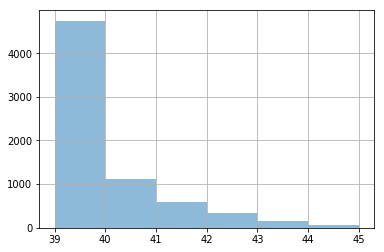

In [75]:
x = df4.prgLength
x.hist(bins=6, histtype='stepfilled', alpha=.5)   

We are ready to compute the probability that the baby will be born in the week 39 for a pregnant woman in the beginning of week 39.

In [76]:
print(len(df4[(df4.prgLength == 39)].index)/float(len(df4)))

0.6789752397309289


Let's now add the second condition.

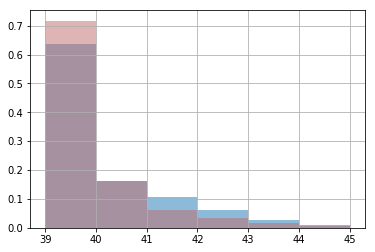

In [77]:
firstbirth39 = df4[(df4.birthOrd == 1)]
othersbirth39 = df4[(df4.birthOrd > 1)]
x = firstbirth39['prgLength']
y = othersbirth39['prgLength']
x.hist(bins=6,  normed=True, histtype='stepfilled', alpha=.5)   # default number of bins = 10, blue
y.hist(bins=6,  normed=True, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75))

In [78]:
print('Probability First baby on week 39: ', 
    len(firstbirth39[(firstbirth39.prgLength == 39)].index)/
    float(len(firstbirth39.index)))

Probability First baby on week 39:  0.634644250975683


In [79]:
print('Probability non first baby to be born on week 39: ',
    len(othersbirth39[(othersbirth39.prgLength == 39)].index)/
    float(len(othersbirth39.index)))


Probability non first baby to be born on week 39:  0.7169863775368363


### Discussions.

After exploring the data we have seem some **appearent effects** that seem to support our first hypothesis:

+ **Data description**: The mean pregnant lenght for first babies is 38.76 and for other babies is 38.65.

+ **Relative risk**: First babies are about 67% more likely to be late.

+ **Conditional probability**: If someone is pregnant and it is the beginning of week 39, the chance (63% vs. 72%) that the baby will be born in the week 39 is lower if it is the first baby.

### Other possible experiments

We can compare the first and others for the same woman. While may be unlikely it could still be that a tendency exists for a woman's second, third, etc, child comes earlier.

<small>(Result:  The second baby is born about some hours earlier, but this difference is not *statistically significant*.)<small>

### Main reference
*Think Stats: Probability and Statistics for Programmers*, by Allen B. Downey, published by O'Reilly Media.
http://www.greenteapress.com/thinkstats/